In [2]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [39]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# perform query to get temperatures using extract method on specified month
results = session.query(Measurement.tobs).filter(extract('month',Measurement.date)==6).all()


In [40]:
#  3. Convert the June temperatures to a list.
# ouptut from query is already a list with the ".all()" feature from the query
June_temps = results

In [41]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temp_df = pd.DataFrame(June_temps,columns=['temp_obs'])



In [42]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temp_df.describe()

,temp_obs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [43]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# perform query to get temperatures for start/end dates
results = session.query(Measurement.tobs).filter(extract('month',Measurement.date)==12).all()


In [44]:
# 7. Convert the December temperatures to a list.
# ouptut from query is already a list with the ".all()" feature from the query
Dec_temps = results

In [45]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temp_df = pd.DataFrame(Dec_temps,columns=['temp_obs'])


In [46]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temp_df.describe()

,temp_obs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 1.0, 'Hawaii June & Dec Temps 2010 to 2016')

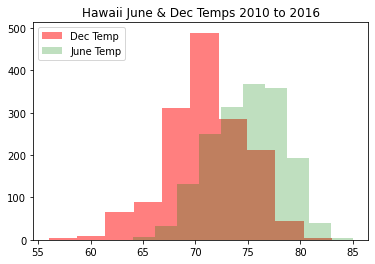

In [47]:
#plt.hist(June_temp_df['temp_obs'],alpha=0.5,label='June Temp')
plt.hist(Dec_temp_df['temp_obs'],alpha=0.5,color='red',label= 'Dec Temp')
plt.hist(June_temp_df['temp_obs'],alpha=0.25,color='green',label='June Temp')
plt.legend(loc='upper left')
plt.title('Hawaii June & Dec Temps 2010 to 2016')

In [10]:
#Additonal queries
#  1. Rain data for June and December
results = session.query(Measurement.prcp).filter(extract('month',Measurement.date)==6).all()

In [11]:
June_rain_df = pd.DataFrame(results,columns=['rain'])

In [12]:
June_rain_df.describe()

,rain
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [13]:
results = session.query(Measurement.prcp).filter(extract('month',Measurement.date)==12).all()

In [14]:
Dec_rain_df = pd.DataFrame(results,columns=['rain'])

In [15]:
Dec_rain_df.describe()

,rain
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


Text(0.5, 1.0, 'Hawaii June & Dec Rainfall 2010 to 2016')

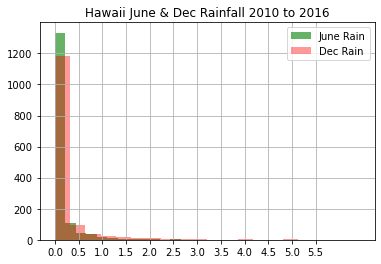

In [33]:
#plt.hist(June_temp_df['temp_obs'],alpha=0.5,label='June Temp'
plt.hist(June_rain_df['rain'],alpha=0.6,color='green',bins=20, label='June Rain')
plt.hist(Dec_rain_df['rain'],alpha=0.4,color='red',bins=20, label= 'Dec Rain')

plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(np.arange(0.0,6.0,0.5))
plt.title('Hawaii June & Dec Rainfall 2010 to 2016')